In [2]:
import os
import sys

# Change the current working directory to the desired path
os.chdir(r"C:\Users\scslliu\OneDrive - University of Leeds\GitProject\WVEBD")

# Add the parent directory of the current working directory to sys.path
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))
print("Current Working Directory:", os.getcwd())

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
from datasets.generateData import load_data
import seaborn as sns
import matplotlib.cm as cm


Current Working Directory: C:\Users\scslliu\OneDrive - University of Leeds\GitProject\WVEBD


In [3]:
def monotonicity_score_positive(x, y):
    n = len(x)
    count = 0
    total = 0
    for i in range(n):
        for j in range(i + 1, n):
            if x[i] < x[j]:
                total += 1
                if y[i] < y[j]:
                    count += 1
    return count, total

In [4]:
def monotonicity_score_negative(x, y):
    n = len(x)
    count = 0
    total = 0
    for i in range(n):
        for j in range(i + 1, n):
            if x[i] < x[j]:
                total += 1
                if y[i] > y[j]:
                    count += 1
    return count, total

In [5]:
# ========================================================================================
# Consistency computation
def compute_consistency(df_subset):
    result = {}
    for method in quality_metrics:
        count_consistency = 0
        count_total = 0
        for dataset in df_subset["Dataset Name"].unique():
            df_dataset = df_subset[df_subset["Dataset Name"] == dataset]
            if method in positive_change_methods:
                df_sorted = df_dataset.sort_values(
                    by=["No. Covered Data Points by Different Classes", method],
                    ascending=[True, True]
                )
            elif method in negative_change_methods:
                df_sorted = df_dataset.sort_values(
                    by=["No. Covered Data Points by Different Classes", method],
                    ascending=[True, False]
                )
            x = df_sorted["No. Covered Data Points by Different Classes"].values
            y = df_sorted[method].values

            if method in positive_change_methods:
                count, total = monotonicity_score_positive(x, y)
            elif method in negative_change_methods:
                count, total = monotonicity_score_negative(x, y)

            count_consistency += count
            count_total += total
        percentage = (count_consistency / count_total) * 100 if count_total > 0 else 0
        result[method] = percentage
    return result

In [6]:
# ========================================================================================
# Load the data
# Assuming your notebook is in the root directory of the project
file_location = os.path.join(os.getcwd(), 'datasets', 'simulated_datasets', 'metadata_metrics.csv')
file_location_1 = os.path.join(os.getcwd(), 'datasets', 'DimRed_data', 'metadata_metrics_DimRed.csv')
data_1 = load_data(file_location)
data_2 = load_data(file_location_1)

# Concatenate datasets
df = pd.concat([data_1, data_2], ignore_index=True)

method_abbreviations = {
    "M_distance": "MD",
    "LOF Distance": "LOFD",
    "Isolation Forest Distance": "IFD",
    "Centroid Distance": "CED",
    "Average Linkage Method Distance": "ALMD",
    "Complete Linkage Method Distance": "CLMD",
    "Single Linkage Method Distance": "SLMD",
    "Leverage Score Distance": "LSD",
    "Cook Distance": "COD",
    "Orthogonal Distance to Lowess Line": "ODLL",
    "Vertical Distance to Lowess Line": "VDLL",
    "Horizontal Distance to Lowess Line": "HDLL",
    "Visibility Index": "VI",
    "Grid Density Overlap Degree": "GDOD",
    "Pairwise Bounding Box Overlap Degree": "PBBOD",
    "MPix": "MP",
    "Nearest Neighbor Distance": "NND",
    "Kernel Density Overlap Degree": "KDOD"
}


# Attributes
time_cost_attributes = [
    'M_distance Calculation Time', 'LOF Distance Calculation Time', 'Isolation Forest Distance Calculation Time',
    'Centroid Distance Calculation Time', 'Average Linkage Method Distance Calculation Time',
    'Complete Linkage Method Distance Calculation Time', 'Single Linkage Method Distance Calculation Time',
    'Leverage Score Distance Calculation Time', 'Cook Distance Calculation Time',
    'Orthogonal Distance to Lowess Line Calculation Time', 'Vertical Distance to Lowess Line Calculation Time',
    'Horizontal Distance to Lowess Line Calculation Time', 'Visibility Index Calculation Time',
    'Grid Density Overlap Degree Calculation Time', 'Pairwise Bounding Box Overlap Degree Calculation Time',
    'Kernel Density Overlap Degree Calculation Time', 'MPix Calculation Time', 'Nearest Neighbor Distance Calculation Time'
]


# List of quality metrics
quality_metrics = [
    'M_distance', 'LOF Distance', 'Isolation Forest Distance',
    'Centroid Distance', 'Average Linkage Method Distance',
    'Complete Linkage Method Distance', 'Single Linkage Method Distance',
    'Leverage Score Distance', 'Cook Distance',
    'Orthogonal Distance to Lowess Line', 'Vertical Distance to Lowess Line',
    'Horizontal Distance to Lowess Line', 'Visibility Index',
    'Grid Density Overlap Degree', 'Pairwise Bounding Box Overlap Degree',
    'Kernel Density Overlap Degree', 'MPix', 'Nearest Neighbor Distance'
]

our_methods = ['M_distance', 'LOF Distance', 'Isolation Forest Distance',
               'Centroid Distance', 'Average Linkage Method Distance',
               'Complete Linkage Method Distance', 'Single Linkage Method Distance',
               'Leverage Score Distance', 'Cook Distance',
               'Orthogonal Distance to Lowess Line', 'Vertical Distance to Lowess Line',
               'Horizontal Distance to Lowess Line']

compare_methods = ['Visibility Index',
                   'Grid Density Overlap Degree', 'Pairwise Bounding Box Overlap Degree',
                   'Kernel Density Overlap Degree', 'MPix', 'Nearest Neighbor Distance']

positive_change_methods = ['Pairwise Bounding Box Overlap Degree', 'MPix']
negative_change_methods = our_methods + ['Visibility Index', 'Grid Density Overlap Degree',
                                         'Kernel Density Overlap Degree', 'Nearest Neighbor Distance']

# Ensure all method columns are numeric
# df[quality_metrics] = df[quality_metrics].apply(pd.to_numeric, errors='coerce')
df[quality_metrics] = df[quality_metrics].apply(pd.to_numeric, errors='coerce').round(2)

df.sample(10)     # Show 3 random rows

,Scatterplot Name,Dataset Name,Number of Entire Data,Number of Classes,Shape,Marker Size,M_distance,M_distance Calculation Time,LOF Distance,LOF Distance Calculation Time,...,Kernel Density Overlap Degree,Kernel Density Overlap Degree Calculation Time,Nearest Neighbor Distance,Nearest Neighbor Distance Calculation Time,Pairwise Bounding Box Overlap Degree,Pairwise Bounding Box Overlap Degree Calculation Time,No. Covered Data Points,No. Covered Data Points by Different Classes,Categories Covered Data Points by Different Classes,well-separated
578,figure_category_basedmarkersize50_clusternumbe...,clusternumber5_datanumber200_testnumbercategor...,1000,5,['cluster' 'linear'],50,0.22,5.433388,0.26,0.354923,...,0.03,0.108618,3.56,0.007141,NaN,15.000000,29,12,"[{'category': 'group_3', 'number': 6}, {'categ...",no
251,figure_descendingmarkersize50_clusternumber3_d...,clusternumber3_datanumber100_testnumbercategor...,300,3,['lip_cluster' 'cluster'],50,0.53,0.322957,0.40,0.734874,...,0.02,0.033812,7.39,0.003095,0.03,4.300867,0,0,[],1-class-1-cluster
1342,figure_ascendingmarkersize50_ms_interleaved_40...,ms_interleaved_40_80_3d_50_GlimmerMDS_2,205,3,['no_shape'],50,0.90,0.306369,0.85,0.298451,...,0.03,0.021182,21.25,0.003017,0.01,2.017913,0,0,[],no
412,figure_descendingmarkersize20_clusternumber3_d...,clusternumber3_datanumber500_testnumbercategor...,1500,3,['lip_cluster' 'cluster'],20,0.35,0.346613,0.15,0.351582,...,0.02,0.120980,2.79,0.012033,NaN,15.000000,3,5,"[{'category': 'group_0', 'number': 3}, {'categ...",1-class-1-cluster
821,figure_descendingmarkersize50_cereal_GlimmerMDS_2,cereal_GlimmerMDS_2,77,7,['no_shape' 'three_order'],50,1.00,1.599836,0.99,0.360056,...,0.02,0.009006,31.32,0.000985,0.01,0.369128,0,0,[],no
1692,figure_descendingmarkersize20_n500-d5-c3-spr0....,n500-d5-c3-spr0.1-out0_TSNE_2,500,3,['cluster'],20,0.98,0.323558,0.99,10.419777,...,0.03,0.093490,9.92,0.004336,0.01,14.790259,0,0,[],1-class-1-cluster
349,figure_descendingmarkersize20_clusternumber3_d...,clusternumber3_datanumber200_testnumbercategor...,600,3,['cluster' 'lip_cluster'],20,0.45,0.336758,0.44,0.329149,...,0.02,0.072952,6.47,0.005002,NaN,15.000000,2,0,[],no
1670,figure_category_basedmarkersize10_n500-d10-c5-...,n500-d10-c5-spr0.2-out0_GlimmerMDS_2,500,5,['cluster'],10,0.84,0.308188,0.83,0.304606,...,0.03,0.054613,12.41,0.005421,0.01,10.575448,0,0,[],no
984,figure_ascendingmarkersize50_interleaved_100_2...,interleaved_100_200_10d_0_notcramped_notrotate...,1490,10,['cluster' 'lip_cluster'],50,0.59,0.385615,0.59,1.847095,...,0.03,0.126037,4.35,0.011111,NaN,15.000000,12,0,[],1-class-1-cluster
24,figure_descendingmarkersize10_clusternumber2_d...,clusternumber2_datanumber100_testnumbercategor...,200,2,['cluster' 'three_order'],10,0.89,0.982960,0.87,0.675269,...,0.03,0.055227,6.39,0.004000,0.02,4.679126,0,0,[],1-class-1-cluster


In [40]:
# Which dataset name is not 9 times

from collections import Counter

# Count occurrences of each dataset name
dataset_counts = Counter(df['Dataset Name'])

# Find dataset names not appearing exactly 9 times
not_nine = {name: count for name, count in dataset_counts.items() if count != 9}

# Display the result
if not_nine:
    print("Datasets not appearing exactly 9 times:")
    for name, count in not_nine.items():
        print(f"{name}: {count} times")
else:
    print("All dataset names appear exactly 9 times.")

Datasets not appearing exactly 9 times:
clusternumber2_datanumber500_testnumbercategorysmall_repeatnumber1: 10 times
clusternumber2_datanumber100_testnumbercategorylarge_repeatnumber0: 8 times
interleaved_100_500_3_25_cramped_rotated_GlimmerMDS_2: 7 times


In [46]:
# The range of data items and number of classes
print(f"The maximum value of data items is {max(df['Number of Entire Data'])}.")
print(f"The minimum value of data items is {min(df['Number of Entire Data'])}.")
print(f"The maximum value of class number is {max(df['Number of Classes'])}.")
print(f"The minimum value of class number is {min(df['Number of Classes'])}.")
print(f"The maximum value of covered data points is {max(df['No. Covered Data Points'])}.")
print(f"The minimum value of covered data points is {min(df['No. Covered Data Points'])}.")

print(f"The maximum value of covered data points by different colored data is {max(df['No. Covered Data Points by Different Classes'])}.")
print(f"The minimum value of covered data points by different colored data is {min(df['No. Covered Data Points by Different Classes'])}.")

The maximum value of data items is 7776.
The minimum value of data items is 77.
The maximum value of class number is 53.
The minimum value of class number is 2.
The maximum value of covered data points is 615.
The minimum value of covered data points is 0.
The maximum value of covered data points by different colored data is 4307.
The minimum value of covered data points by different colored data is 0.


In [7]:
# # ===============================================
# # Remove the data that don't change the hidden data points

# # Filter based on unique values of 'No. Covered Data Points by Different Classes'
# filtered_data = []

# for dataset in df["Dataset Name"].unique():
#     df_dataset = df[df["Dataset Name"] == dataset]
#     unique_values = df_dataset["No. Covered Data Points by Different Classes"].unique()

#     if unique_values.size >1:
#         for val in unique_values:
#             filtered_data.append(df_dataset[df_dataset["No. Covered Data Points by Different Classes"] == val].iloc[[0]])
#     else:
#         pass

# df = pd.concat(filtered_data)

In [8]:
# df.to_csv('data_container.csv', index=False)

In [9]:
# df = df[df['Number of Classes']<=8]

In [10]:
# ===========================================================================================
# Filter to well-separated datasets
df_1class1cluster = df[df['well-separated'] == '1-class-1-cluster']
df_1classmcluster = df[df['well-separated'] == '1-class-m-cluster']
df_not_well_separated = df[df['well-separated'] == 'no']
df_well_separated = df[
    (df['well-separated'] == '1-class-1-cluster') | 
    (df['well-separated'] == '1-class-m-cluster')
]
# ========================================================================================

In [11]:
# ========================================================================================
# Process the "Shape" column to identify shape types
def classify_shape(shape_list):
    if isinstance(shape_list, list):
        if all(s == 'cluster' for s in shape_list):
            return 'only_cluster'
        else:
            return 'contains_other_shapes'
    return 'unknown'

# Convert string to list if needed
df["Shape"] = df["Shape"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)
df["shape_group"] = df["Shape"].apply(classify_shape)

# Filter out rows with 'unknown' shape
df_filtered = df[df["shape_group"] != "unknown"]

# Split into shape groups
df_only_cluster = df_filtered[df_filtered["shape_group"] == "only_cluster"]
df_contains_other = df_filtered[df_filtered["shape_group"] == "contains_other_shapes"]

In [12]:
len(df_only_cluster['shape_group'] == 'only_cluster')

368

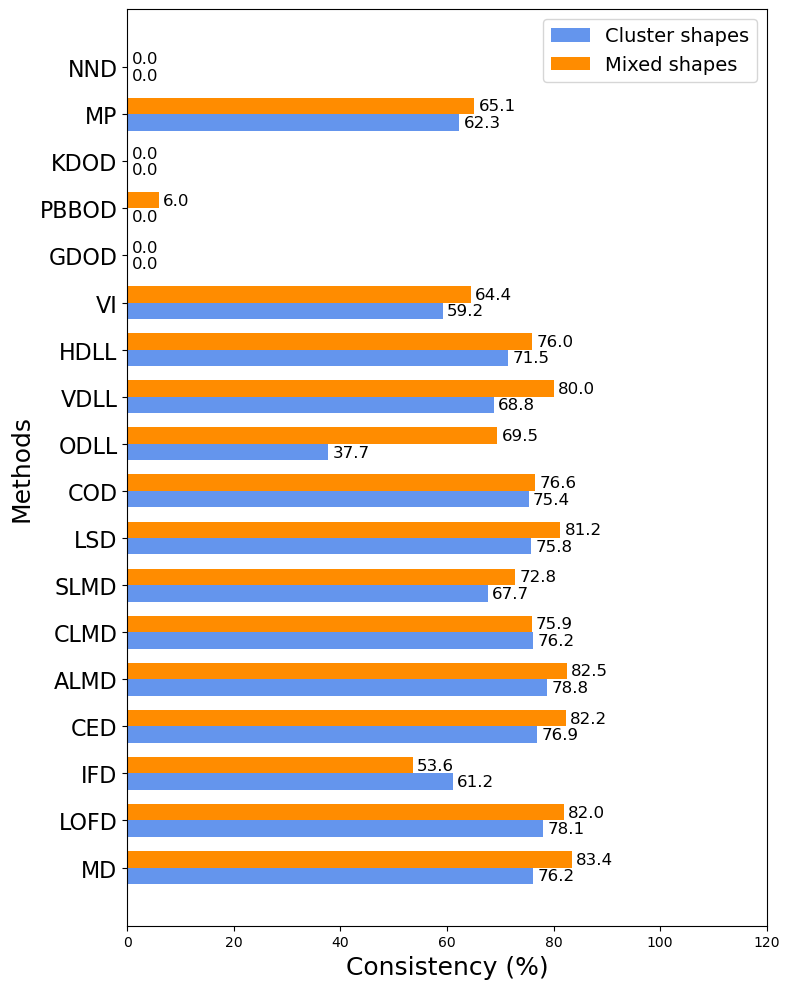

In [13]:
# ========================================================================================
# Compute consistency for both shape groups for the both well-separated data and not-well-separted data
shape_result_cluster = compute_consistency(df_only_cluster)
shape_result_other = compute_consistency(df_contains_other)

# Prepare for horizontal grouped bar chart
methods = list(shape_result_cluster.keys())
cluster_scores = [shape_result_cluster[m] for m in methods]
other_scores = [shape_result_other[m] for m in methods]

# ========================================================================================
# Plot horizontal grouped bar chart
fig, ax = plt.subplots(figsize=(8, 10))

y = np.arange(len(methods))
height = 0.35

bars1 = ax.barh(y - height/2, cluster_scores, height, label='Cluster shapes', color='cornflowerblue')
bars2 = ax.barh(y + height/2, other_scores, height, label='Mixed shapes', color='darkorange')

ax.set_xlabel('Consistency (%)', fontsize=18)
ax.set_ylabel('Methods', fontsize=18)
# ax.set_title('Consistency by Method: Only Cluster vs Other Shapes', fontsize=18)
ax.set_yticks(y)
ax.set_yticklabels([method_abbreviations[m] for m in methods], fontsize=16)
ax.set_xlim(0, 120)
ax.legend(fontsize=14)

# Annotate bars
for bars in [bars1, bars2]:
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{width:.1f}',
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0),
                    textcoords="offset points",
                    ha='left', va='center', fontsize=12)

fig.tight_layout()
plt.show()

In [14]:
# Convert string to list if needed
df_well_separated["Shape"] = df_well_separated["Shape"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)
df_well_separated["shape_group"] = df_well_separated["Shape"].apply(classify_shape)

# Filter out rows with 'unknown' shape
df_filtered = df_well_separated[df_well_separated["shape_group"] != "unknown"]

# Split into shape groups
df_only_cluster_well_separated = df_filtered[df_filtered["shape_group"] == "only_cluster"]
df_contains_other_well_separated = df_filtered[df_filtered["shape_group"] == "contains_other_shapes"]

C:\Users\scslliu\AppData\Local\Temp\ipykernel_26132\1405105330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_well_separated["Shape"] = df_well_separated["Shape"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)
C:\Users\scslliu\AppData\Local\Temp\ipykernel_26132\1405105330.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_well_separated["shape_group"] = df_well_separated["Shape"].apply(classify_shape)


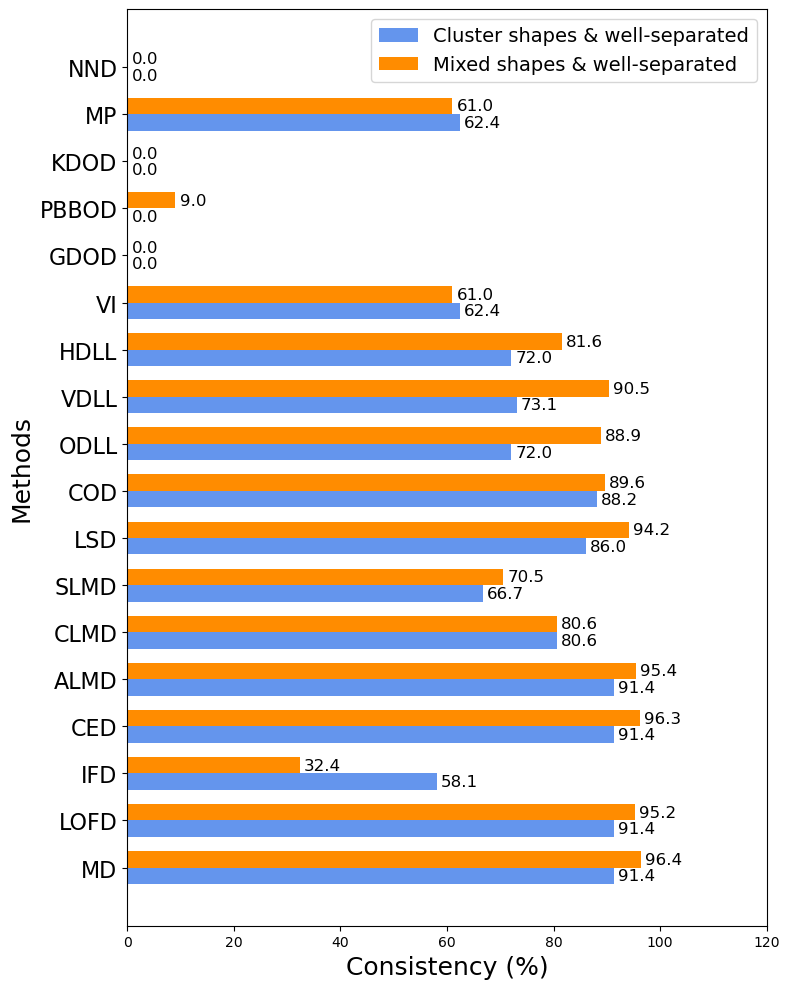

In [15]:
# ========================================================================================
# Compute consistency for both shape groups for the both well-separated data and not-well-separted data
shape_result_cluster = compute_consistency(df_only_cluster_well_separated)
shape_result_other = compute_consistency(df_contains_other_well_separated)
# shape_result_cluster = compute_consistency(df_only_cluster)
# shape_result_other = compute_consistency(df_contains_other)

# Prepare for horizontal grouped bar chart
methods = list(shape_result_cluster.keys())
cluster_scores = [shape_result_cluster[m] for m in methods]
other_scores = [shape_result_other[m] for m in methods]

# ========================================================================================
# Plot horizontal grouped bar chart
fig, ax = plt.subplots(figsize=(8, 10))

y = np.arange(len(methods))
height = 0.35

bars1 = ax.barh(y - height/2, cluster_scores, height, label='Cluster shapes & well-separated', color='cornflowerblue')
bars2 = ax.barh(y + height/2, other_scores, height, label='Mixed shapes & well-separated', color='darkorange')

ax.set_xlabel('Consistency (%)', fontsize=18)
ax.set_ylabel('Methods', fontsize=18)
# ax.set_title('Consistency by Method: Only Cluster vs Other Shapes', fontsize=18)
ax.set_yticks(y)
ax.set_yticklabels([method_abbreviations[m] for m in methods], fontsize=16)
ax.set_xlim(0, 120)
ax.legend(fontsize=14)

# Annotate bars
for bars in [bars1, bars2]:
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{width:.1f}',
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0),
                    textcoords="offset points",
                    ha='left', va='center', fontsize=12)

fig.tight_layout()
plt.show()

In [16]:
# # Group by Dataset Name and count unique KDE values
# kde_variation = df_only_cluster_not_well_separated.groupby("Dataset Name")["Kernel Density Overlap Degree"].nunique()

# # Find dataset names with more than one unique KDE value
# inconsistent_datasets = kde_variation[kde_variation > 1].index

# # Extract rows that belong to these inconsistent datasets
# inconsistent_rows = df_only_cluster_not_well_separated[
#     df_only_cluster_not_well_separated["Dataset Name"].isin(inconsistent_datasets)
# ]

# # Display the inconsistent rows
# print(inconsistent_rows)

In [17]:
# Convert string to list if needed
df_not_well_separated["Shape"] = df_not_well_separated["Shape"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)
df_not_well_separated["shape_group"] = df_not_well_separated["Shape"].apply(classify_shape)

# Filter out rows with 'unknown' shape
df_filtered = df_not_well_separated[df_not_well_separated["shape_group"] != "unknown"]

# Split into shape groups
df_only_cluster_not_well_separated = df_filtered[df_filtered["shape_group"] == "only_cluster"]
df_contains_other_not_well_separated = df_filtered[df_filtered["shape_group"] == "contains_other_shapes"]

C:\Users\scslliu\AppData\Local\Temp\ipykernel_26132\2598020106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_well_separated["Shape"] = df_not_well_separated["Shape"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)
C:\Users\scslliu\AppData\Local\Temp\ipykernel_26132\2598020106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_well_separated["shape_group"] = df_not_well_separated["Shape"].apply(classify_shape)


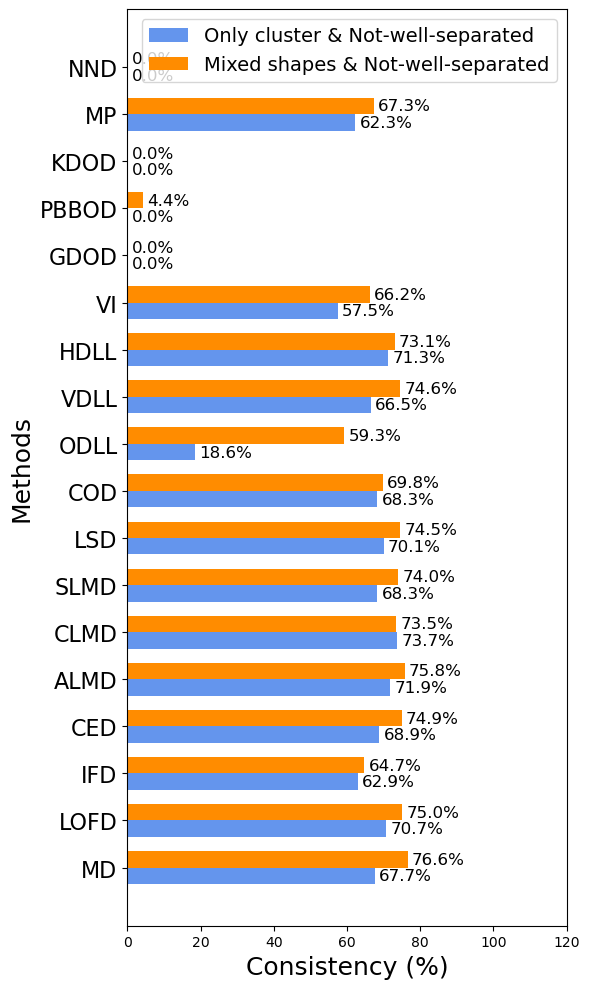

In [18]:
# ========================================================================================
# Compute consistency for both shape groups for the both well-separated data and not-well-separted data
shape_result_cluster = compute_consistency(df_only_cluster_not_well_separated)
shape_result_other = compute_consistency(df_contains_other_not_well_separated)

# Prepare for horizontal grouped bar chart
methods = list(shape_result_cluster.keys())
cluster_scores = [shape_result_cluster[m] for m in methods]
other_scores = [shape_result_other[m] for m in methods]

# ========================================================================================
# Plot horizontal grouped bar chart
fig, ax = plt.subplots(figsize=(6, 10))

y = np.arange(len(methods))
height = 0.35

bars1 = ax.barh(y - height/2, cluster_scores, height, label='Only cluster & Not-well-separated', color='cornflowerblue')
bars2 = ax.barh(y + height/2, other_scores, height, label='Mixed shapes & Not-well-separated', color='darkorange')

ax.set_xlabel('Consistency (%)', fontsize=18)
ax.set_ylabel('Methods', fontsize=18)
# ax.set_title('Consistency by Method: Only Cluster vs Other Shapes', fontsize=18)
ax.set_yticks(y)
ax.set_yticklabels([method_abbreviations[m] for m in methods], fontsize=16)
ax.set_xlim(0, 120)
ax.legend(fontsize=14)

# Annotate bars
for bars in [bars1, bars2]:
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{width:.1f}%',
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0),
                    textcoords="offset points",
                    ha='left', va='center', fontsize=12)

fig.tight_layout()
plt.show()

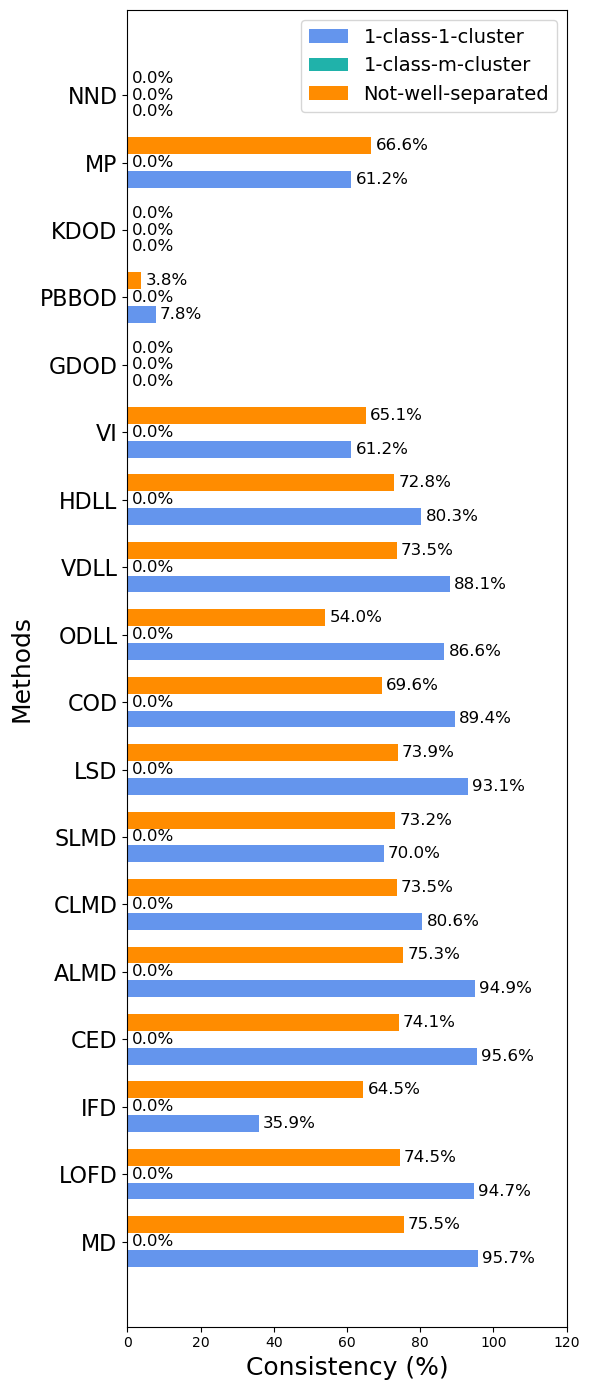

In [19]:
# ========================================================================================
# Compute consistency for both shape groups for both well-separated and not-well-separated data
shape_result_1class1cluster = compute_consistency(df_1class1cluster)
shape_result_1classmcluster = compute_consistency(df_1classmcluster)  # Fixed line
shape_result_not_well = compute_consistency(df_not_well_separated)

# Prepare for horizontal grouped bar chart
methods = list(shape_result_1class1cluster.keys())  # Assuming all results share same methods
cluster1_scores = [shape_result_1class1cluster[m] for m in methods]
clusterm_scores = [shape_result_1classmcluster[m] for m in methods]
not_well_scores = [shape_result_not_well[m] for m in methods]

# ========================================================================================
# Plot horizontal grouped bar chart
fig, ax = plt.subplots(figsize=(6, 14))

y = np.arange(len(methods))
height = 0.25

bars1 = ax.barh(y - height, cluster1_scores, height, label='1-class-1-cluster', color='cornflowerblue')
bars2 = ax.barh(y, clusterm_scores, height, label='1-class-m-cluster', color='lightseagreen')  # Different color
bars3 = ax.barh(y + height, not_well_scores, height, label='Not-well-separated', color='darkorange')

ax.set_xlabel('Consistency (%)', fontsize=18)
ax.set_ylabel('Methods', fontsize=18)
# ax.set_title('Consistency', fontsize=18)
ax.set_yticks(y)
ax.set_yticklabels([method_abbreviations[m] for m in methods], fontsize=16)
ax.set_xlim(0, 120)
ax.legend(fontsize=14)

# Annotate bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{width:.1f}%',
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0),
                    textcoords="offset points",
                    ha='left', va='center', fontsize=12)

fig.tight_layout()
plt.show()


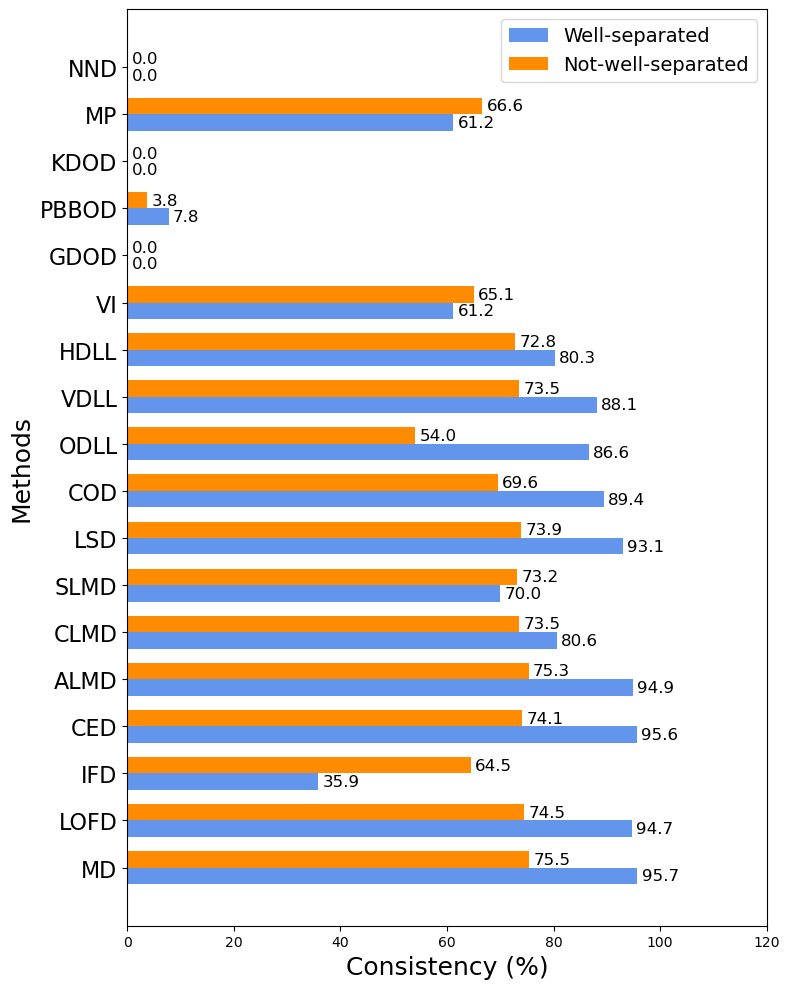

In [20]:
# ========================================================================================
# Compute consistency for both shape groups for the both well-separated data and not-well-separted data
shape_result_well = compute_consistency(df_well_separated)
shape_result_not_well = compute_consistency(df_not_well_separated)

# Prepare for horizontal grouped bar chart
methods = list(shape_result_well.keys())
cluster_scores = [shape_result_well[m] for m in methods]
other_scores = [shape_result_not_well[m] for m in methods]

# ========================================================================================
# Plot horizontal grouped bar chart
fig, ax = plt.subplots(figsize=(8, 10))

y = np.arange(len(methods))
height = 0.35

bars1 = ax.barh(y - height/2, cluster_scores, height, label='Well-separated', color='cornflowerblue')
bars2 = ax.barh(y + height/2, other_scores, height, label='Not-well-separated', color='darkorange')

ax.set_xlabel('Consistency (%)', fontsize=18)
ax.set_ylabel('Methods', fontsize=18)
# ax.set_title('Consistency by Method: Only Cluster vs Other Shapes', fontsize=18)
ax.set_yticks(y)
ax.set_yticklabels([method_abbreviations[m] for m in methods], fontsize=16)
ax.set_xlim(0, 120)
ax.legend(fontsize=14)

# Annotate bars
for bars in [bars1, bars2]:
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{width:.1f}',
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0),
                    textcoords="offset points",
                    ha='left', va='center', fontsize=12)

fig.tight_layout()
plt.show()

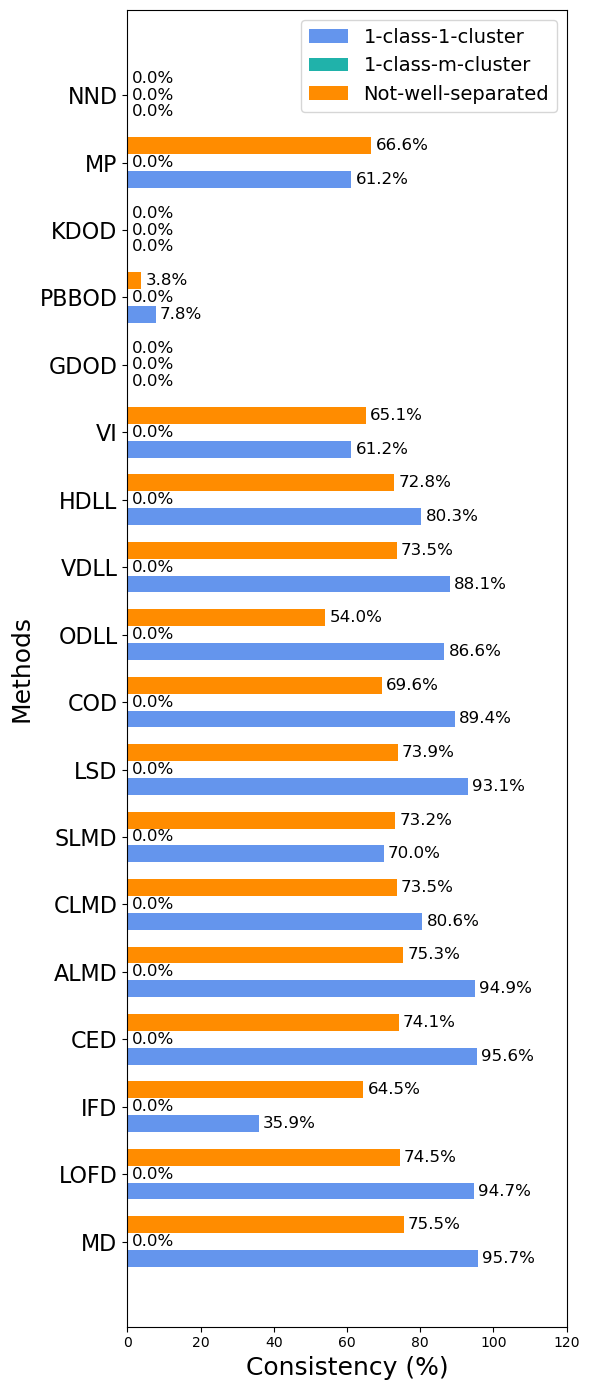

In [21]:
# ========================================================================================
# Compute consistency for both shape groups for both well-separated and not-well-separated data
shape_result_1class1cluster = compute_consistency(df_1class1cluster)
shape_result_1classmcluster = compute_consistency(df_1classmcluster)  # Fixed line
shape_result_not_well = compute_consistency(df_not_well_separated)

# Prepare for horizontal grouped bar chart
methods = list(shape_result_1class1cluster.keys())  # Assuming all results share same methods
cluster1_scores = [shape_result_1class1cluster[m] for m in methods]
clusterm_scores = [shape_result_1classmcluster[m] for m in methods]
not_well_scores = [shape_result_not_well[m] for m in methods]

# ========================================================================================
# Plot horizontal grouped bar chart
fig, ax = plt.subplots(figsize=(6, 14))

y = np.arange(len(methods))
height = 0.25

bars1 = ax.barh(y - height, cluster1_scores, height, label='1-class-1-cluster', color='cornflowerblue')
bars2 = ax.barh(y, clusterm_scores, height, label='1-class-m-cluster', color='lightseagreen')  # Different color
bars3 = ax.barh(y + height, not_well_scores, height, label='Not-well-separated', color='darkorange')

ax.set_xlabel('Consistency (%)', fontsize=18)
ax.set_ylabel('Methods', fontsize=18)
# ax.set_title('Consistency', fontsize=18)
ax.set_yticks(y)
ax.set_yticklabels([method_abbreviations[m] for m in methods], fontsize=16)
ax.set_xlim(0, 120)
ax.legend(fontsize=14)

# Annotate bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{width:.1f}%',
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0),
                    textcoords="offset points",
                    ha='left', va='center', fontsize=12)

fig.tight_layout()
plt.show()


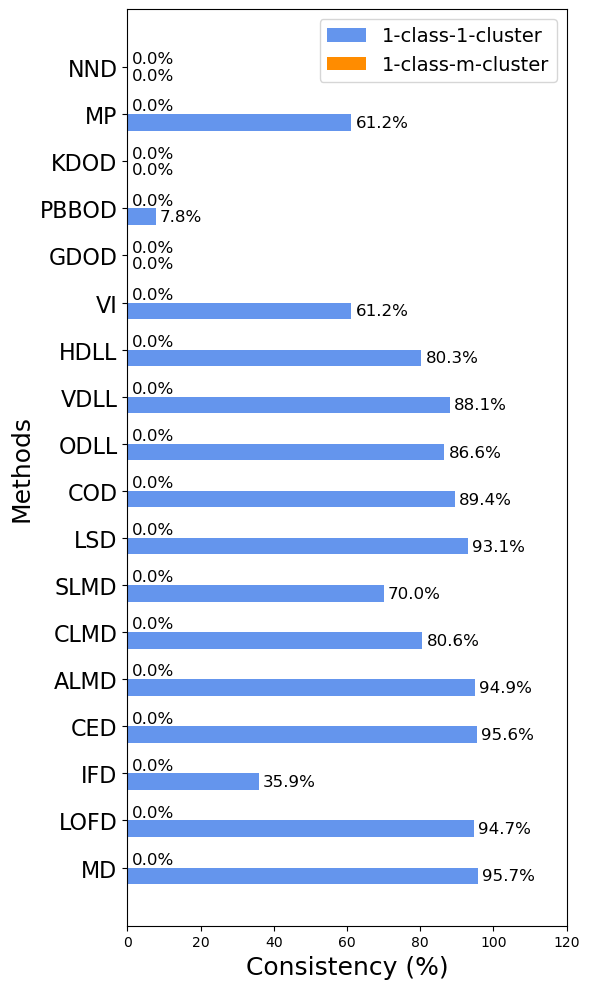

In [22]:
# ========================================================================================
# Compute consistency for both shape groups: well-separated and not-well-separated
shape_result_1class1cluster = compute_consistency(df_1class1cluster)
shape_result_not_well = compute_consistency(df_1classmcluster)

# Prepare data for horizontal grouped bar chart
methods = list(shape_result_1class1cluster.keys())

# Make sure methods are consistent in both dictionaries
assert methods == list(shape_result_not_well.keys()), "Mismatch in methods between datasets"

cluster1_scores = [shape_result_1class1cluster[m] for m in methods]
not_well_scores = [shape_result_not_well[m] for m in methods]

# ========================================================================================
# Plot horizontal grouped bar chart
fig, ax = plt.subplots(figsize=(6, 10))

y = np.arange(len(methods))
height = 0.35

bars1 = ax.barh(y - height/2, cluster1_scores, height, label='1-class-1-cluster', color='cornflowerblue')
bars2 = ax.barh(y + height/2, not_well_scores, height, label='1-class-m-cluster', color='darkorange')

ax.set_xlabel('Consistency (%)', fontsize=18)
ax.set_ylabel('Methods', fontsize=18)
ax.set_yticks(y)
ax.set_yticklabels([method_abbreviations.get(m, m) for m in methods], fontsize=16)
ax.set_xlim(0, 120)
ax.legend(fontsize=14)

# Annotate bars
for bars in [bars1, bars2]:
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{width:.1f}%',
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0),
                    textcoords="offset points",
                    ha='left', va='center', fontsize=12)

fig.tight_layout()
plt.show()


### How is consistency effected by the number of classes
We want to see our quality metric performance to the difference number of classes

#### Step 1: prepare for the datasets

In [23]:
grouped = df.groupby("Number of Classes")
class_counts = sorted(df["Number of Classes"].unique())
plot_data_for_class_consistency = {method: [] for method in quality_metrics}
for cls in class_counts:
    df_group = grouped.get_group(cls)
    consistency_result = compute_consistency(df_group)
    for method in quality_metrics:
        plot_data_for_class_consistency[method].append(consistency_result.get(method, 0))
        
plot_df = pd.DataFrame(plot_data_for_class_consistency, index=class_counts).T  # Methods as rows
plot_df.sample(10)  

,2,3,4,5,6,7,8,10,11,12,13,15,16,28,32,53
Isolation Forest Distance,42.772861,53.382084,0.0,51.025641,75.0,0.0,86.111111,91.304348,0.0,66.666667,0.0,83.908046,100.0,66.666667,83.333333,69.444444
Visibility Index,62.831858,60.146252,0.0,65.384615,75.0,0.0,41.666667,69.565217,0.0,72.222222,0.0,65.517241,75.0,69.444444,75.000000,75.000000
Orthogonal Distance to Lowess Line,71.976401,64.533821,0.0,78.589744,100.0,0.0,0.000000,91.304348,0.0,0.000000,0.0,48.275862,75.0,0.000000,0.000000,0.000000
Grid Density Overlap Degree,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
Single Linkage Method Distance,70.796460,69.469835,0.0,75.384615,75.0,0.0,41.666667,86.956522,0.0,77.777778,0.0,75.862069,75.0,50.000000,75.000000,77.777778
MPix,62.831858,61.974406,0.0,65.384615,75.0,0.0,41.666667,82.608696,0.0,72.222222,0.0,73.563218,75.0,69.444444,75.000000,75.000000
Average Linkage Method Distance,89.085546,83.363803,0.0,83.461538,100.0,0.0,27.777778,91.304348,0.0,63.888889,0.0,80.459770,75.0,41.666667,86.111111,69.444444
M_distance,90.855457,82.815356,0.0,85.256410,100.0,0.0,19.444444,91.304348,0.0,55.555556,0.0,80.459770,75.0,50.000000,86.111111,52.777778
Complete Linkage Method Distance,77.581121,77.148080,0.0,74.615385,100.0,0.0,55.555556,91.304348,0.0,75.000000,0.0,80.459770,75.0,50.000000,86.111111,83.333333
Nearest Neighbor Distance,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000


#### Step 2: We plot the frequency distribution of the data across the number of classes
We plot the bar chart to see how data items distribution on in the aspect of the number of clasees.

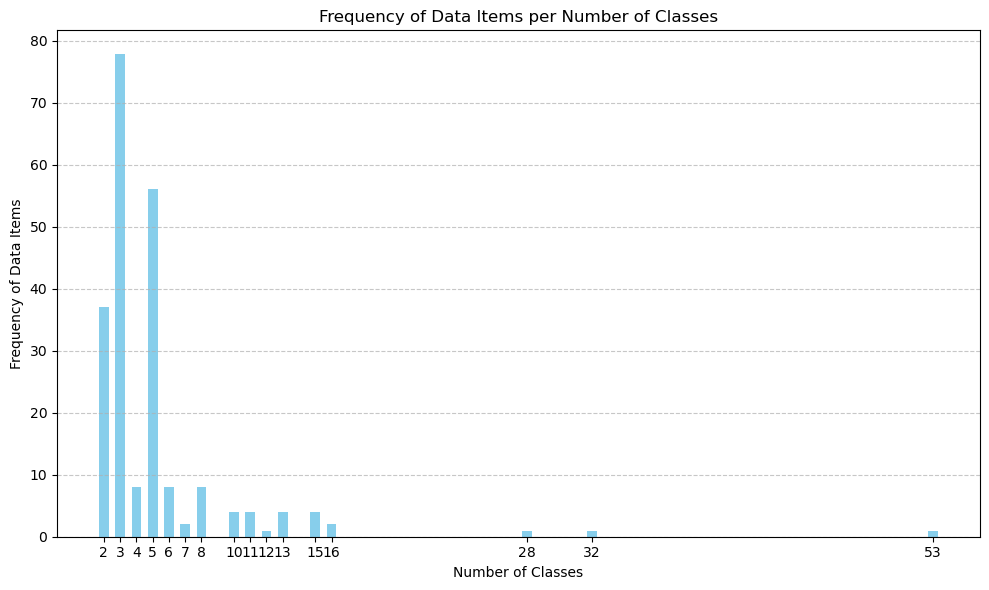

In [24]:
# Count frequency of data items per number of classes
class_freq = df['Number of Classes'].value_counts().sort_index()/9

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(class_freq.index, class_freq.values, width=0.6, color='skyblue')

plt.xlabel('Number of Classes')
plt.ylabel('Frequency of Data Items')
plt.title('Frequency of Data Items per Number of Classes')
plt.xticks(class_freq.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Step 3: generate different plots for analyzing it

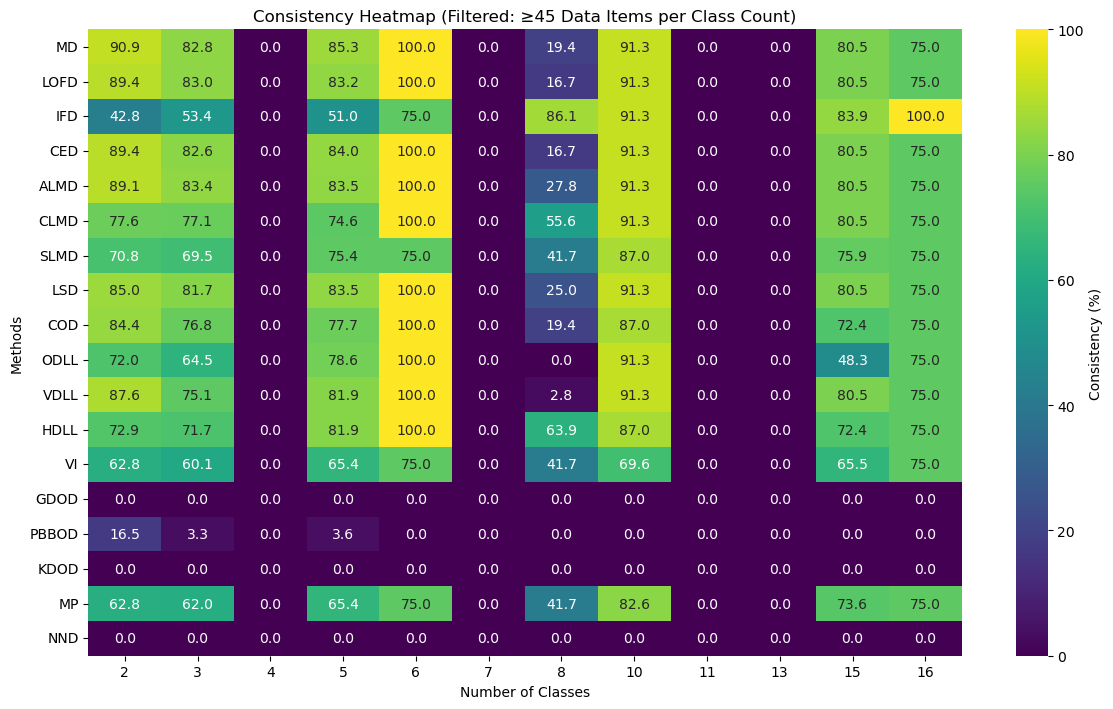

In [25]:
# Step 1: Filter out class groups with fewer than 5 data items
class_counts_filtered = df['Number of Classes'].value_counts()
valid_classes = class_counts_filtered[class_counts_filtered > 9].index

# Step 2: Recompute consistency only for valid class groups
plot_data_filtered = {method_abbreviations[method]: [] for method in quality_metrics}
filtered_class_list = sorted(valid_classes)

grouped = df.groupby("Number of Classes")
for cls in filtered_class_list:
    df_group = grouped.get_group(cls)
    consistency_result = compute_consistency(df_group)
    for method in quality_metrics:
        plot_data_filtered[method_abbreviations[method]].append(consistency_result.get(method, 0))

# Step 3: Build DataFrame for heatmap
heatmap_data_filtered = pd.DataFrame(plot_data_filtered, index=filtered_class_list).T  # methods as rows

# Step 4: Plot the heatmap
plt.figure(figsize=(12, len(quality_metrics) * 0.4))
sns.heatmap(heatmap_data_filtered, annot=True, fmt=".1f", cmap="viridis", cbar_kws={'label': 'Consistency (%)'})

plt.xlabel("Number of Classes")
plt.ylabel("Methods")
plt.title("Consistency Heatmap (Filtered: ≥45 Data Items per Class Count)")
plt.tight_layout()
plt.show()

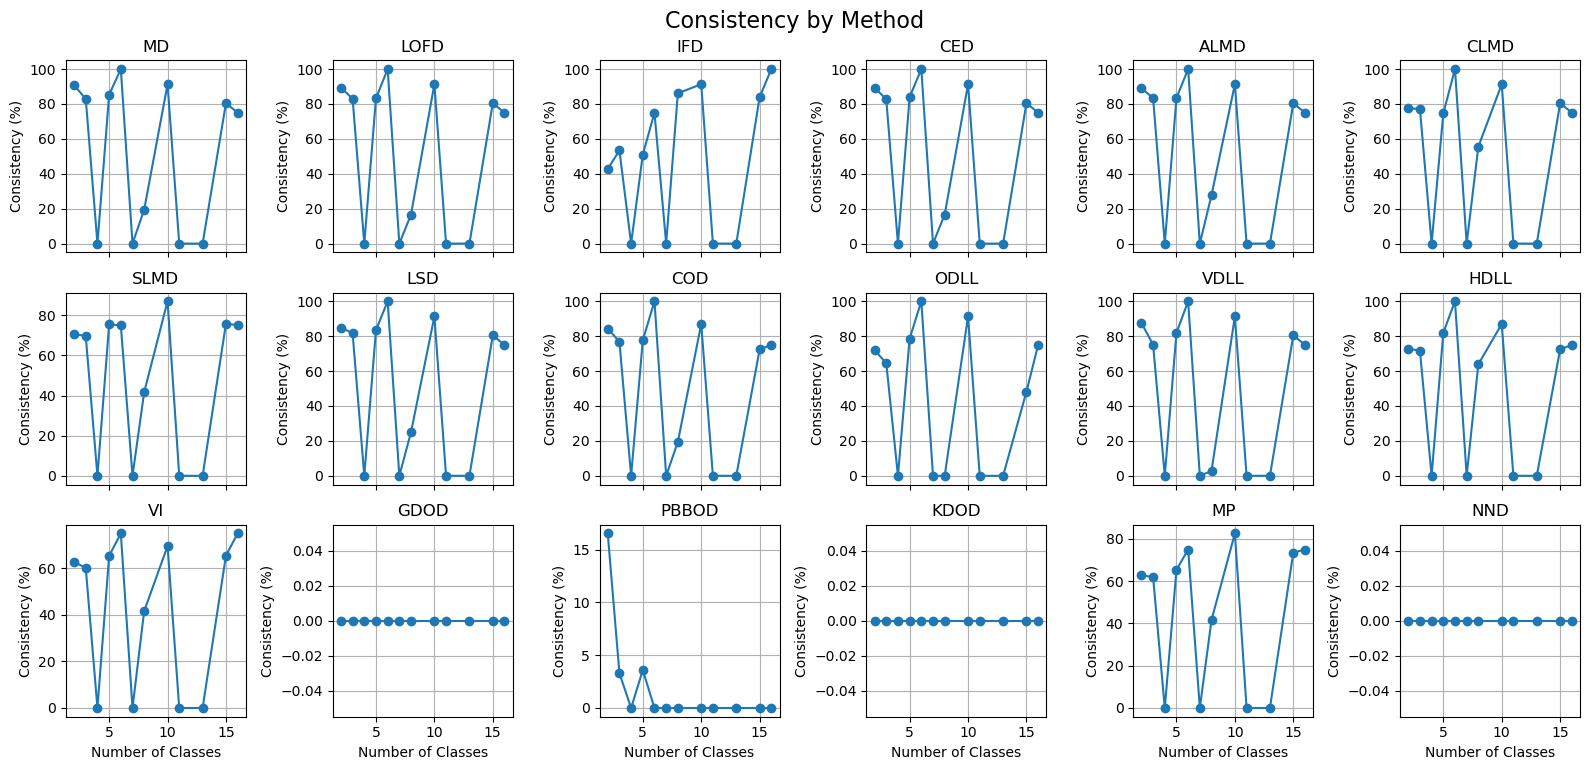

In [26]:
n_methods = len(quality_metrics)
n_cols = 6
n_rows = (n_methods + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 2.5), sharex=True)

for i, method in enumerate(quality_metrics):
    ax = axes[i // n_cols, i % n_cols]
    ax.plot(filtered_class_list, plot_data_filtered[method_abbreviations[method]], marker='o')
    ax.set_title(method_abbreviations.get(method, method))
    ax.set_ylabel("Consistency (%)")
    if i // n_cols == n_rows - 1:
        ax.set_xlabel("Number of Classes")
    ax.grid(True)

plt.tight_layout()
plt.suptitle("Consistency by Method", fontsize=16, y=1.02)
plt.show()

C:\Users\scslliu\AppData\Local\Temp\ipykernel_26132\3243624543.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', len(time_cost_attributes))


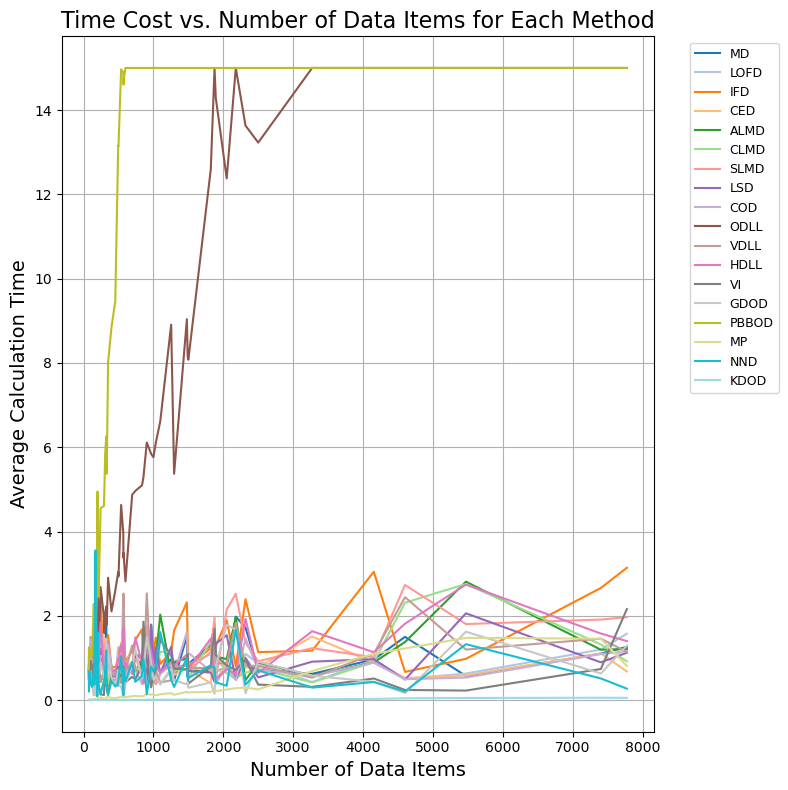

In [27]:
# Strip ' Calculation Time' from attribute names to match keys in method_abbreviations
method_names = method_abbreviations.keys()
abbreviated_labels = [method_abbreviations.get(label, label) for label in method_names]  # fallback to full name if not found

# Group by 'Number of Entire Data' and compute means
grouped = df.groupby('Number of Entire Data')[time_cost_attributes].mean().reset_index()

# Plot
plt.figure(figsize=(8, 8))
cmap = cm.get_cmap('tab20', len(time_cost_attributes))
for i, (attr, abbr) in enumerate(zip(time_cost_attributes, abbreviated_labels)):
    plt.plot(grouped['Number of Entire Data'], grouped[attr], label=abbr, color=cmap(i))

plt.xlabel('Number of Data Items', fontsize=14)
plt.ylabel('Average Calculation Time', fontsize=14)
plt.title('Time Cost vs. Number of Data Items for Each Method', fontsize=16)
plt.legend(fontsize=9, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

C:\Users\scslliu\AppData\Local\Temp\ipykernel_26132\2018996910.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', len(time_cost_attributes))


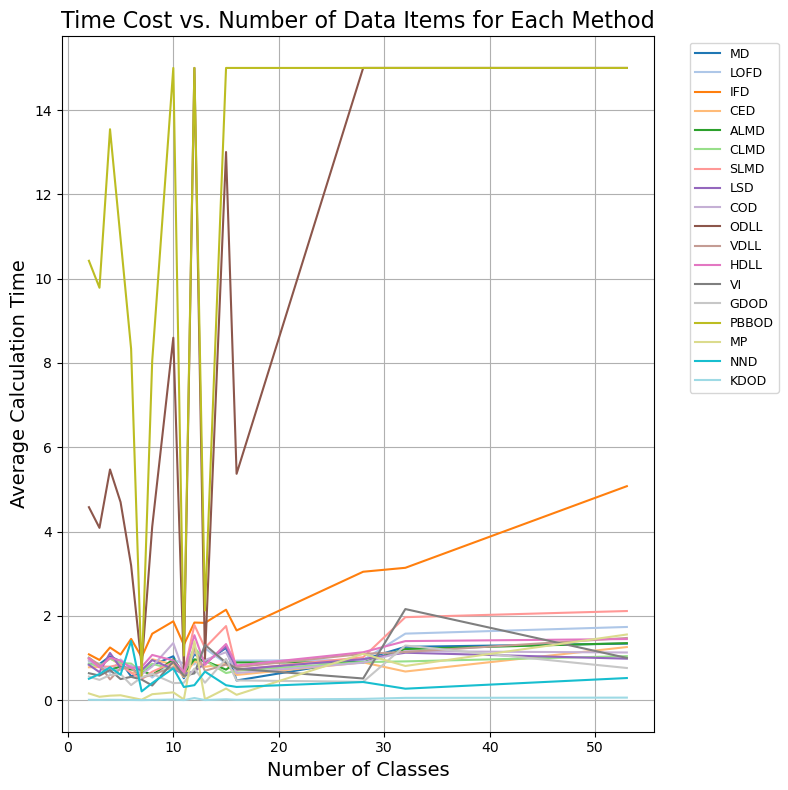

In [28]:
# Strip ' Calculation Time' from attribute names to match keys in method_abbreviations
method_names = method_abbreviations.keys()
abbreviated_labels = [method_abbreviations.get(label, label) for label in method_names]  # fallback to full name if not found

# Group by 'Number of Classes' and compute means
grouped = df.groupby('Number of Classes')[time_cost_attributes].mean().reset_index()

# Plot
plt.figure(figsize=(8, 8))
cmap = cm.get_cmap('tab20', len(time_cost_attributes))
for i, (attr, abbr) in enumerate(zip(time_cost_attributes, abbreviated_labels)):
    plt.plot(grouped['Number of Classes'], grouped[attr], label=abbr, color=cmap(i))

plt.xlabel('Number of Classes', fontsize=14)
plt.ylabel('Average Calculation Time', fontsize=14)
plt.title('Time Cost vs. Number of Data Items for Each Method', fontsize=16)
plt.legend(fontsize=9, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

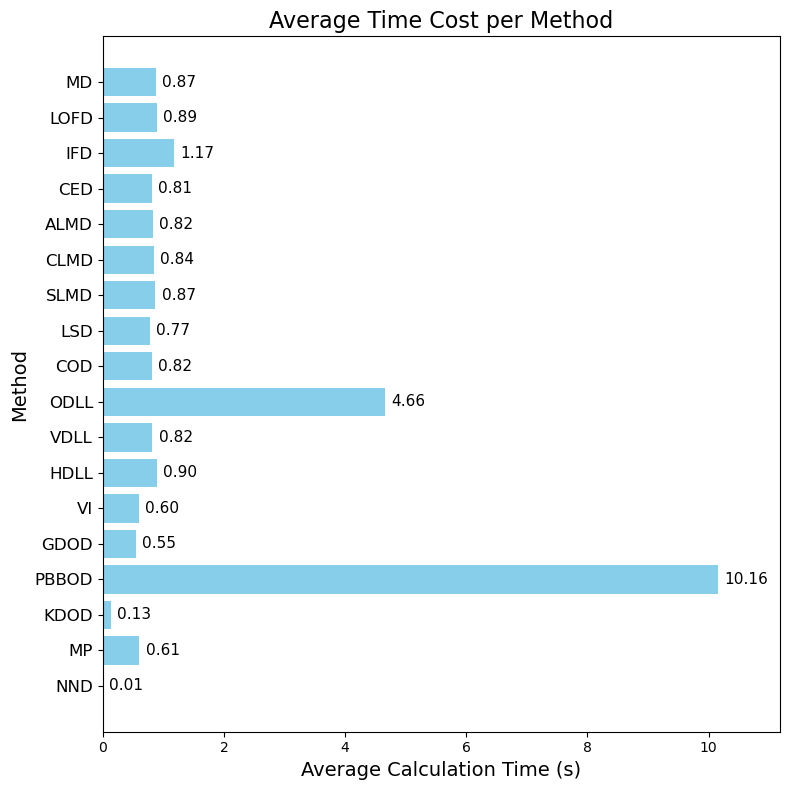

In [29]:
# Compute average time cost for each method (preserve original order)
avg_costs = [df[attr].mean() for attr in time_cost_attributes]
cleaned_labels = [attr.replace(' Calculation Time', '') for attr in time_cost_attributes]

# Apply abbreviations to labels
abbreviated_labels = [method_abbreviations.get(label, label) for label in cleaned_labels]

# Plot the horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 8))
y = np.arange(len(abbreviated_labels))

bars = ax.barh(y, avg_costs, color='skyblue')
ax.set_yticks(y)
ax.set_yticklabels(abbreviated_labels, fontsize=12)
ax.set_xlabel('Average Calculation Time (s)', fontsize=14)
ax.set_ylabel('Method', fontsize=14)
ax.set_title('Average Time Cost per Method', fontsize=16)
ax.set_xlim([0, max(avg_costs) * 1.1])  # Set x-limit to avoid long bars touching the edge
ax.invert_yaxis()

# Annotate each bar with its value
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + max(avg_costs) * 0.01,  # slight padding from the end of the bar
            bar.get_y() + bar.get_height() / 2,
            f'{width:.2f}', va='center', fontsize=11)

fig.tight_layout()
# plt.grid(True)
plt.show()

### How does time cost change with marker sizes?

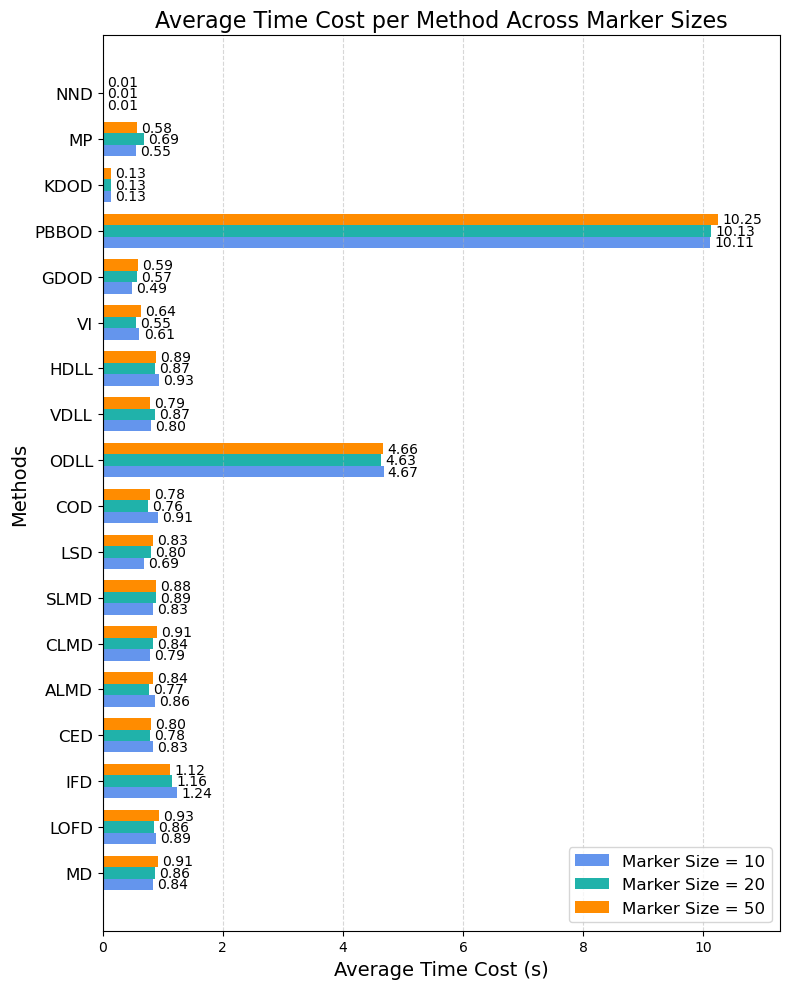

In [30]:
# ========================================================================================
# Ensure the Marker Size column exists; if not, create it
# (It may be 'No. Covered Data Points by Different Classes')
if 'Marker Size' not in df.columns:
    df['Marker Size'] = df['No. Covered Data Points by Different Classes']

# Compute average time cost for each marker size
df_10_avg = df[df['Marker Size'] == 10][time_cost_attributes].mean()
df_20_avg = df[df['Marker Size'] == 20][time_cost_attributes].mean()
df_50_avg = df[df['Marker Size'] == 50][time_cost_attributes].mean()

# Prepare method abbreviations for y-axis
method_names = [attr.replace(' Calculation Time', '') for attr in time_cost_attributes]
y_labels = [method_abbreviations.get(name, name) for name in method_names]

# ========================================================================================
# Plot horizontal grouped bar chart
fig, ax = plt.subplots(figsize=(8, 10))

y = np.arange(len(time_cost_attributes))
height = 0.25

bars1 = ax.barh(y - height, df_10_avg.values, height, label='Marker Size = 10', color='cornflowerblue')
bars2 = ax.barh(y, df_20_avg.values, height, label='Marker Size = 20', color='lightseagreen')
bars3 = ax.barh(y + height, df_50_avg.values, height, label='Marker Size = 50', color='darkorange')

ax.set_xlabel('Average Time Cost (s)', fontsize=14)
ax.set_ylabel('Methods', fontsize=14)
ax.set_yticks(y)
ax.set_yticklabels(y_labels, fontsize=12)
ax.set_xlim(0, max(df_50_avg.max(), df_20_avg.max(), df_10_avg.max()) * 1.1)
ax.legend(fontsize=12, loc='lower right')

# Annotate bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{width:.2f}',
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0),
                    textcoords="offset points",
                    ha='left', va='center', fontsize=10)

plt.title('Average Time Cost per Method Across Marker Sizes', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.5)
fig.tight_layout()
plt.show()


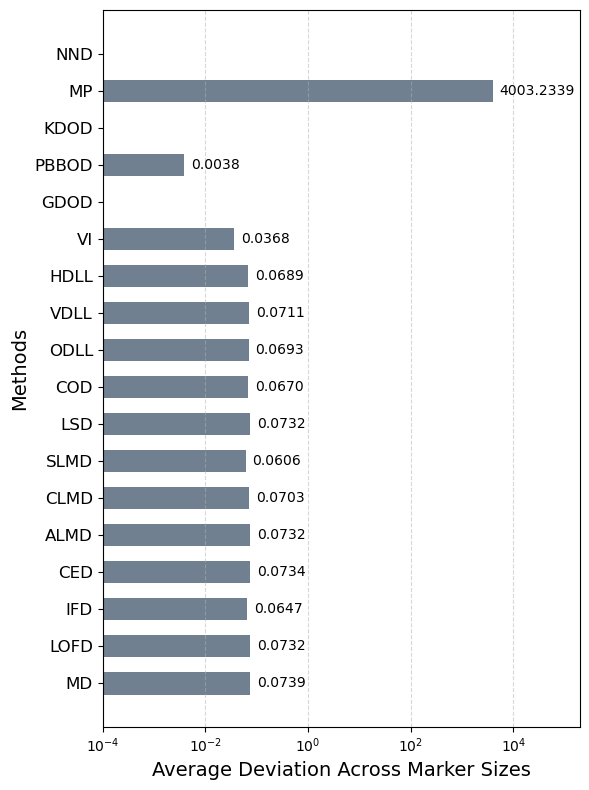

In [31]:
# Step 1: Filter category-based scatterplots
category_data = df[df['Scatterplot Name'].str.contains('category', na=False)].copy()

# Ensure all method columns are numeric
for col in methods:
    category_data[col] = pd.to_numeric(category_data[col], errors='coerce')

# Initialize dictionary
deviation_dict = {metric: [] for metric in methods}

# Step 3: Calculate deviation across marker sizes
# Group by dataset
for dataset, group in category_data.groupby('Dataset Name'):
    pivot = group.pivot_table(index='Marker Size', values=methods, aggfunc='mean')

    if len(pivot) == 3:
        deviations = pivot.std(ddof=0)  # or use pivot.max() - pivot.min()
        for metric in methods:
            if metric in deviations and pd.notna(deviations[metric]):
                deviation_dict[metric].append(deviations[metric])

# Step 4: Average deviation values
avg_deviation_values = [
    np.mean(deviation_dict[metric]) if deviation_dict[metric] else 0
    for metric in methods
]

# Prepare y-axis labels
y_labels = [method_abbreviations.get(name, name) for name in methods]

# Step 5: Plot
fig, ax = plt.subplots(figsize=(6, 8))

y = np.arange(len(avg_deviation_values))
height = 0.6

bars = ax.barh(y, avg_deviation_values, height=height, color='slategray')

ax.set_xlabel('Average Deviation Across Marker Sizes', fontsize=14)
ax.set_ylabel('Methods', fontsize=14)
ax.set_yticks(y)
ax.set_yticklabels(y_labels, fontsize=12)

# ✅ Use log scale here:
ax.set_xscale('log')
ax.set_xlim(left=max(min(avg_deviation_values), 1e-4), right=max(avg_deviation_values) * 50)

# Annotate bars
for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{width:.4f}',
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0),
                textcoords="offset points",
                ha='left', va='center', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.5)
fig.tight_layout()
plt.show()


In [32]:
# values = [1.0, 1.2, 0.9, 1.1]
values = [1.0, 1.0, 1.0]
std_dev = np.std(values, ddof=0)  # population standard deviation (ddof=0)
print(std_dev)

0.0


In [33]:
# Step 1: Filter scatterplots based on the marker size
marker_size_data = df[df['Marker Size'] == 20]



# Step 3: Calculate deviation across marker sizes
# Group by dataset
i = 1
mpix_dev = []
for dataset, group in marker_size_data.groupby('Dataset Name'):
    pivot = group.pivot_table(index='Scatterplot Name', values=methods, aggfunc='mean')
    mpix_dev.append(pivot.std(ddof=0).round(4)['MPix'])
print(len(mpix_dev))

219


In [34]:
len(deviation_dict['MPix'])

218

In [35]:
group['MPix'].std(ddof=0)

0.0

In [36]:
len(deviation_dict['MPix'])

218

In [37]:
group[metric].std(ddof=0)

0.0

In [38]:
# Step 1: Filter scatterplots based on the marker size
marker_size_data = df[df['Marker Size'] == 20]

# Step 3: Calculate deviation across marker sizes
# Group by dataset
i = 0
deviation_dict_marker_size = {}
for dataset, group in marker_size_data.groupby('Dataset Name'):
    for metric in methods:
        deviation_dict_marker_size[metric].append(group[metric].std(ddof=0))
    i = i + 1

# Prepare y-axis labels
y_labels = [method_abbreviations.get(name, name) for name in methods]

# Step 5: Plot
fig, ax = plt.subplots(figsize=(6, 8))

y = np.arange(len(avg_deviation_values))
height = 0.6

bars = ax.barh(y, avg_deviation_values, height=height, color='slategray')

ax.set_xlabel('Average Deviation Across Rendering Orders', fontsize=14)
ax.set_ylabel('Methods', fontsize=14)
ax.set_yticks(y)
ax.set_yticklabels(y_labels, fontsize=12)

# ✅ Use log scale here:
ax.set_xscale('log')
ax.set_xlim(left=max(min(avg_deviation_values), 1e-4), right=max(avg_deviation_values) * 50)


# Annotate bars
for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{width:.4f}',
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0),
                textcoords="offset points",
                ha='left', va='center', fontsize=10)

# plt.title('Average Deviation per Method', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.5)
fig.tight_layout()
plt.show()

KeyError: 'M_distance'